## Diabetes_prediction Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.stats as stats
# import plotly.express as px
# import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,RidgeClassifier
from lazypredict.Supervised import LazyClassifier


## Upload Dataset

In [2]:
# Now upload the Dataset
data=pd.read_csv('diabetesdataset.csv')
data.sample(7)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
100,100,1,163,72,0,0,39.00,1.22,33,1
479,479,4,132,86,31,0,28.00,0.42,63,0
724,724,1,111,94,0,0,32.80,0.27,45,0
55,55,1,73,50,10,0,23.00,0.25,21,0
751,751,1,121,78,39,74,39.00,0.26,28,0
707,707,2,127,46,21,335,34.40,0.18,22,0
70,70,2,100,66,20,90,32.90,0.87,28,1


## Data Analysis

In [3]:
print("Number Of Rows",data.shape[0])
print("Number Of Columns",data.shape[1])
data.shape

Number Of Rows 768
Number Of Columns 10


(768, 10)

In [4]:
data.corr()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.00,-0.04,0.01,0.02,0.02,0.00,0.01,-0.04,0.01,-0.05
Pregnancies,-0.04,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.01,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.02,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,0.02,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,0.00,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.01,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.04,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.01,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,-0.05,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [5]:
data.drop(['Unnamed: 0', 'BloodPressure', 'SkinThickness'], axis=1, inplace=True)

#### Now check the behaviour of the data outliers present or Not

In [6]:
data.skew()/len(data)*100

Pregnancies                 0.12
Glucose                     0.02
Insulin                     0.30
BMI                        -0.06
DiabetesPedigreeFunction    0.25
Age                         0.15
Outcome                     0.08
dtype: float64

<Axes: >

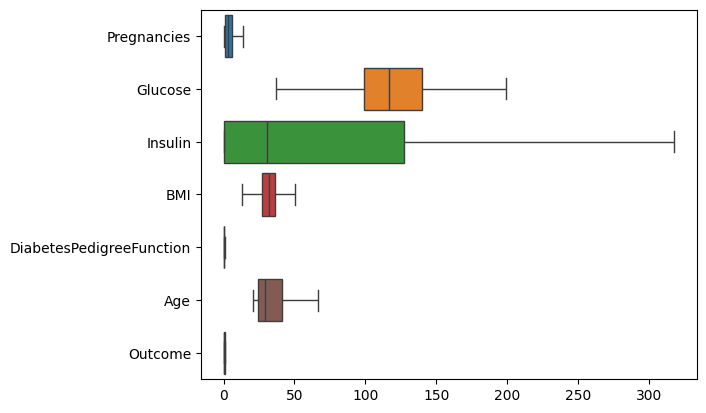

In [7]:
def iqr_capping(dataset,outlier_col):
    name=outlier_col.name
    
    percentile25 = outlier_col.quantile(0.25)
    percentile75 = outlier_col.quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    outlier_col = np.where(
    outlier_col > upper_limit,
    upper_limit,
    np.where(
        outlier_col < lower_limit,
        lower_limit,
        outlier_col
        )
    )
    dataset[name] = outlier_col
    
    return dataset

new_data=iqr_capping(data,data['Pregnancies'])
new_data=iqr_capping(data,data['Glucose'])
# new_data=iqr_capping(data,data['BloodPressure'])
# new_data=iqr_capping(data,data['SkinThickness'])
new_data=iqr_capping(data,data['Insulin'])
new_data=iqr_capping(data,data['BMI'])
new_data=iqr_capping(data,data['DiabetesPedigreeFunction'])
new_data=iqr_capping(data,data['Age'])
sns.boxplot(data=data,orient="h")

## Standardization

In [8]:
# def standardscaler(dataset,List_non_applicable_col):
#     X=dataset.drop(List_non_applicable_col,axis=1)

#     scaled=StandardScaler()

#     scaled.fit(X)

#     dataset_scaled=scaled.transform(X)
    
#     dataframe_transformation = pd.DataFrame(dataset_scaled,columns=X.columns)
    
#     fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
#     ax1.set_title("Before Transformation")
#     sns.kdeplot(data=dataset,ax=ax1)
#     ax1.set_title("After Transformation")
#     sns.kdeplot(data=dataframe_transformation,ax=ax2)
#     plt.show()
    
#     return dataframe_transformation

# standardscaler_dataset=standardscaler(data,['Outcome'])


In [9]:
# # so here i'm updating the datset which is modify during standardization
# data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=standardscaler_dataset[[ 'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Train-Test-Split

In [10]:
# Seprate the Input column in X and output save in Y-variable
X=data.drop('Outcome',axis=1)
y=data['Outcome']
print('X Shape',X.shape)
print('Y Shape',y.shape)

X Shape (768, 6)
Y Shape (768,)


In [11]:
# Now Train the Model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (537, 6)
X_test (231, 6)
y_train (537,)
y_test (231,)


In [12]:
# # from sklearn.linear_model import LinearRegression,RidgeClassifier,DecisonTree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB

In [13]:
clf = RidgeClassifier(random_state=0, tol=1e-5)
clf.fit(x_train, y_train)
y_predict_svc=clf.predict(x_test)

In [14]:
clf.score(x_test,y_test)

0.7965367965367965

In [15]:
predictions = clf.predict(x_test)

# Evaluation Metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R2 Score: 0.13723776223776185
Mean Squared Error (MSE): 0.20346320346320346
Mean Absolute Error (MAE): 0.20346320346320346


In [16]:
comparing_data=pd.DataFrame({"Actual":y_test,"Prediction":y_predict_svc})
comparing_data.sample(5)

,Actual,Prediction
483,0,0
279,0,0
593,0,0
681,1,1
254,1,0


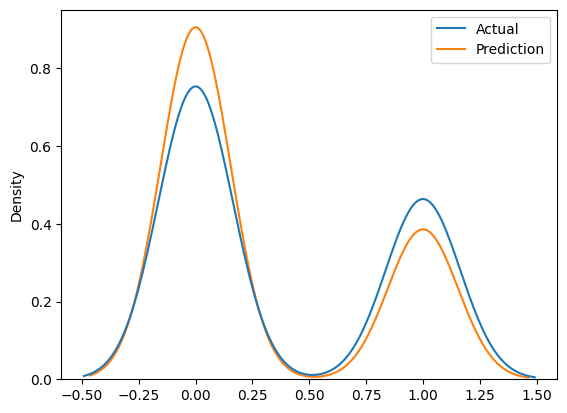

In [17]:
sns.kdeplot(data=comparing_data)
plt.show()

In [18]:
import pickle

In [22]:
pickle.dump(clf,open("diabetes.pkl",("wb")))

In [23]:
model=pickle.load(open("diabetes.pkl","rb"))

In [26]:
model.score(x_train,y_train)

0.7690875232774674

In [28]:
data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.84,121.14,73.65,32.13,0.46,33.20,0.35
std,3.34,31.19,93.58,7.05,0.29,11.63,0.48
min,0.00,37.12,0.00,13.35,0.08,21.00,0.00
25%,1.00,99.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,127.25,36.60,0.63,41.00,1.00
max,13.50,199.00,318.12,50.55,1.20,66.50,1.00


In [27]:
data.sample(1)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.00,197.00,318.12,30.50,0.16,53.00,1


In [32]:
# pregnancies experienced by a person
# Gluscose level
# insulin levels
# 'BMI' column stands for Body Mass Index, a measure derived from an individual's weight and height
# GeneticDiabetesScore

In [38]:
Pregnancies=float(input("How many Pregnancies experience do you have: "))
Glucose=float(input("What is your Glucose Level: "))
Insulin=float(input("What is your Insulin Level: "))
# weight=input("What is your Weight: ")
# Height=input("What is your Height: ")
BMI=float(input("What is your Height: ") )#weight/(Height)**2
DiabetesPedigreeFunction=float(input("What is your GeneticDiabetesScore: "))
Age=float(input("What is your Age: "))

outcome=np.array([[Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age]])

print(model.predict(outcome))
print(clf.predict(outcome))

How many Pregnancies experience do you have:  2
What is your Glucose Level:  197
What is your Insulin Level:  318
What is your Height:  30
What is your GeneticDiabetesScore:  0.16
What is your Age:  53


[1]
[1]


In [40]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64